## Accuracy for the different parameters tested

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [2]:
os.chdir("..")
root_path = os.getcwd()
os.getcwd()

'/home/carmen/PycharmProjects/EnsemblesComplexity'

In [3]:
path_csv = os.chdir(root_path+'/Results_general_algorithm')
df_total = pd.read_csv('SummarizeResults_ParameterConfiguration_CDB.csv')

### Heatmap per complexity measure

In [11]:
def plot_heatmaps(df_total, CM):
    df_total_cm = df_total.loc[df_total['weights'] == CM, :]
    summary_cm = df_total_cm.groupby(['alpha', 'split'], as_index=False)[['accuracy_mean_mean',
                                                                          'accuracy_mean_median',
                                                                          'accuracy_mean_std']].mean()

    df_to_plot_mean = summary_cm.pivot(index='alpha', columns='split', values='accuracy_mean_mean')
    df_to_plot_mean.sort_index(level=0, inplace=True, ascending=False)
    # df_to_plot1 = df_to_plot_mean.reindex(
    #     columns=['1', '2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22', '24', '26', '28', '30'])

    df_to_plot_median = summary_cm.pivot(index='alpha', columns='split', values='accuracy_mean_median')
    df_to_plot_median.sort_index(level=0, inplace=True, ascending=False)
    # df_to_plot2 = df_to_plot_median.reindex(
    #     columns=['1', '2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22', '24', '26', '28', '30'])

    df_to_plot_std = summary_cm.pivot(index='alpha', columns='split', values='accuracy_mean_std')
    df_to_plot_std.sort_index(level=0, inplace=True, ascending=False)
    # df_to_plot3 = df_to_plot_std.reindex(
    #     columns=['1', '2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22', '24', '26', '28', '30'])

    return df_to_plot_mean, df_to_plot_median, df_to_plot_std


#### Hostility

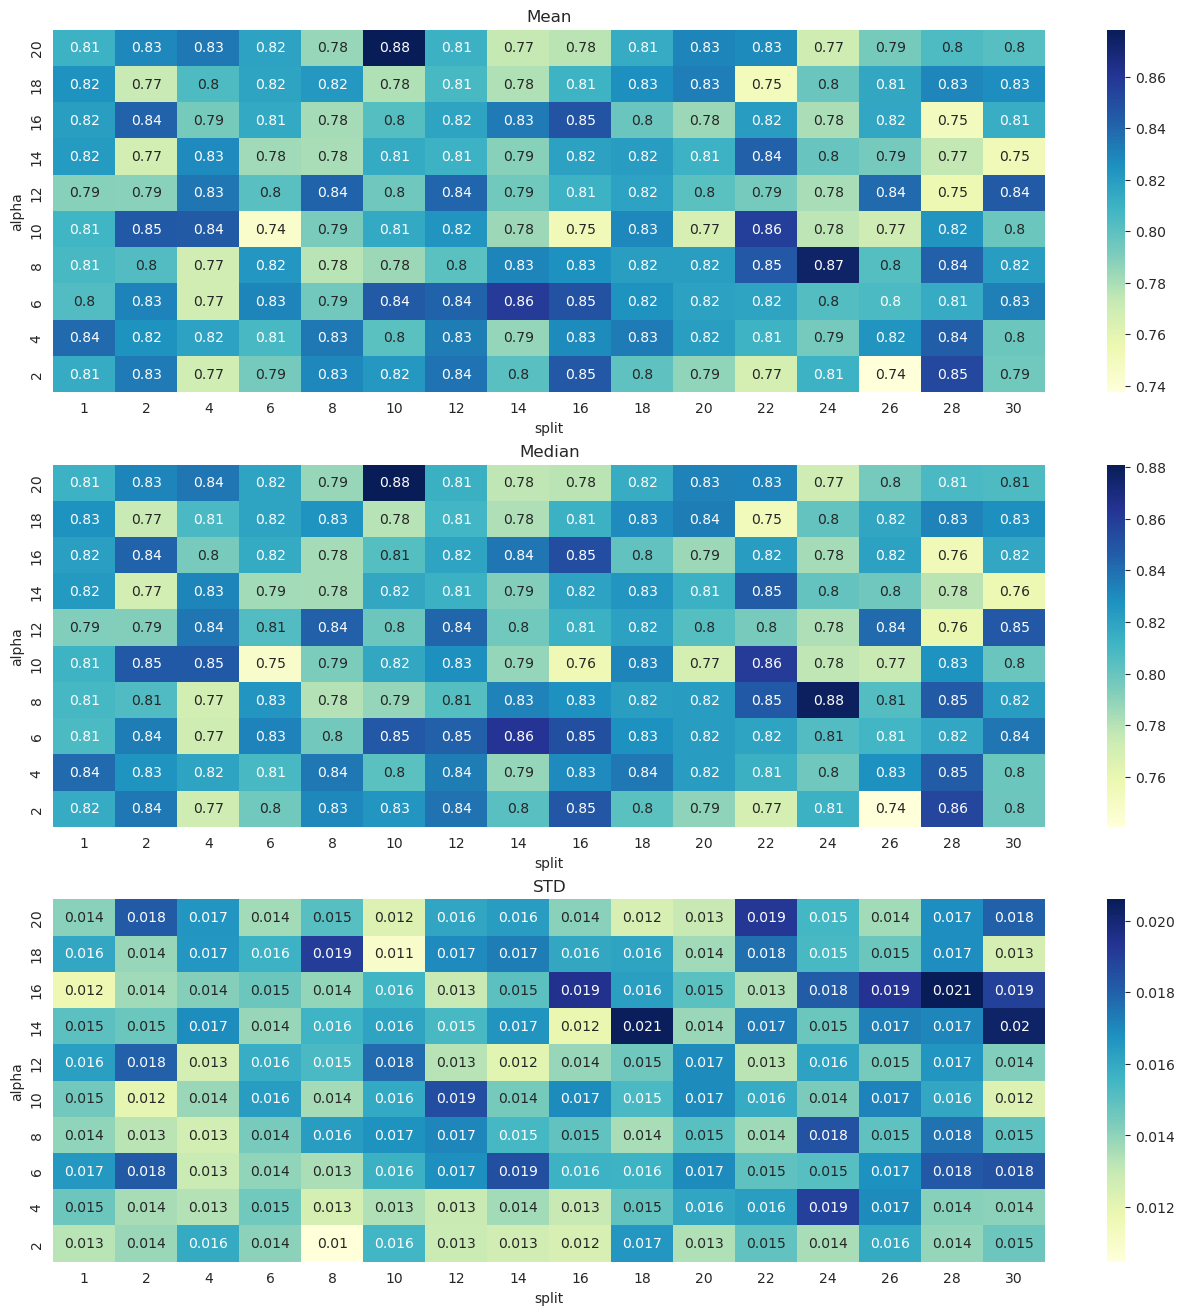

In [15]:
CM = 'Hostility'
df_to_plot1, df_to_plot2, df_to_plot3 = plot_heatmaps(df_total, CM)


fig, axes = plt.subplots(3, 1, figsize=(16, 16))
sns.heatmap(df_to_plot1, cmap="YlGnBu", annot=True,ax=axes[0]).set(title='Mean')
sns.heatmap( df_to_plot2, cmap="YlGnBu", annot=True,ax=axes[1]).set(title='Median')
sns.heatmap( df_to_plot3, cmap="YlGnBu", annot=True,ax=axes[2]).set(title='STD')
plt.show()